In [2]:
import pandas as pd 
import psycopg2
import matplotlib.pyplot as plt
import numpy as np

### Funzioni per connettere il database e trasformarlo in un DataFrame pandas:


In [6]:
def connect(params_dic):
    conn = None
    try:
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params_dic)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1) 
    print("Connection successful")
    return conn



def postgresql_to_dataframe(conn, select_query, column_names):
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Otteniamo una lista di tuple
    tupples = cursor.fetchall()
    cursor.close()
    
    # Convertiamo la lista di tuple in un DataFrame pandas
    df = pd.DataFrame(tupples, columns=column_names)
    return df


Connessione al database:

In [8]:
param_dic = {
    "host"      : "localhost",
    "database"  : "gisa",
    "user"      : "postgres",
    "password"  : "12345"
}

conn = connect(param_dic)

Connecting to the PostgreSQL database...
Connection successful


Conversione in un Pandas dataframe: 

In [17]:
column_names = ["id_stabilimento","asl","comune","provincia_stab","macroarea","aggregazione","attivita","punteggio","categoria_rischio_stabilimento","categoria_assegnata_da_cu","categoria_ex_ante"]
#df = postgresql_to_dataframe(conn,"select * from full___gisa where lower(provincia_stab) != 'null'",column_names)
#df.head()

In [ ]:
df["provincia_stab"]= df["provincia_stab"].apply(str.lower)
df.provincia_stab.value_counts()

Rendo i campi numerici, da stringhe a interi

In [220]:
df['categoria_rischio_stabilimento'] = df['categoria_rischio_stabilimento'].astype(int)
df['punteggio'] = df['punteggio'].astype(int)
df['id_asl'] = df['id_asl'].astype(int)
df['categoria_assegnata_da_cu'] = df['categoria_assegnata_da_cu'].astype(int)
df['categoria_ex_ante'] = df['categoria_ex_ante'].astype(int)

In [221]:
province = ["napoli","salerno","caserta","benevento","avellino"]
prov_mean_stab = {}
prov_mean_cu = {}
prov_mean_exante = {}
for prov in province:
    x = round(df.categoria_rischio_stabilimento.loc[df.provincia_stab == prov].mean(),3)
    prov_mean_stab[prov] = x
    
for prov in provincie:
    x = round(df.categoria_assegnata_da_cu.loc[df.provincia_stab == prov].mean(),3)
    prov_mean_cu[prov] = x

for prov in province:
    x = round(df.categoria_ex_ante.loc[df.provincia_stab == prov].mean(),3)
    prov_mean_exante[prov] = x
print("media categoria_rischio_stabilimento: \n",prov_mean_stab,"\n")
print("media categoria_assegnata_da_cu: \n",prov_mean_cu,"\n")
print("media categoria_ex_ante: \n",prov_mean_exante)

media categoria_rischio_stabilimento: 
 {'napoli': 1.639, 'salerno': 2.035, 'caserta': 1.543, 'benevento': 1.699, 'avellino': 1.504} 

media categoria_assegnata_da_cu: 
 {'napoli': 1.641, 'salerno': 2.033, 'caserta': 1.526, 'benevento': 1.707, 'avellino': 1.508} 

media categoria_ex_ante: 
 {'napoli': 2.599, 'salerno': 2.65, 'caserta': 2.55, 'benevento': 2.657, 'avellino': 2.616}


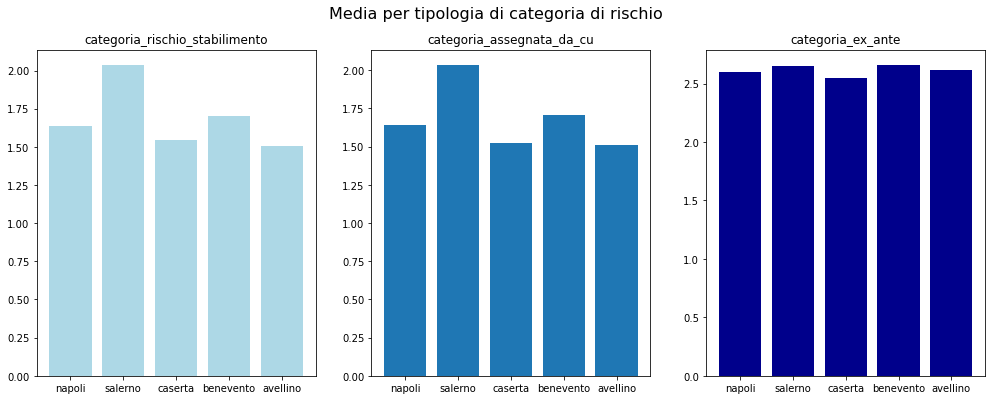

In [222]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (17, 6))
fig.suptitle("Media per tipologia di categoria di rischio", fontsize = 16)

ax1.bar(prov_mean_stab.keys(),prov_mean_stab.values(),color="lightblue")
ax1.set(title="categoria_rischio_stabilimento")

ax2.bar(prov_mean_cu.keys(),prov_mean_cu.values())
ax2.set(title="categoria_assegnata_da_cu")

ax3.bar(prov_mean_exante.keys(),prov_mean_exante.values(),color="darkblue")
ax3.set(title="categoria_ex_ante")

plt.show()

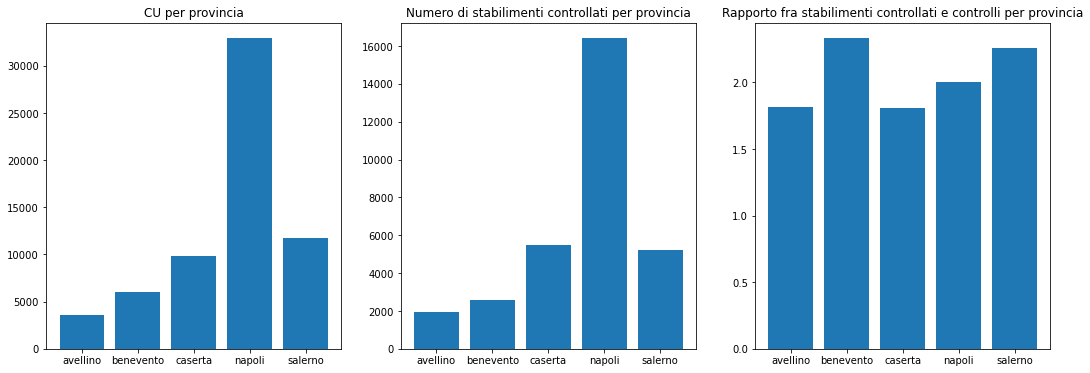


Numero di CU per provincia: 
 {'avellino': 3572, 'benevento': 5992, 'caserta': 9859, 'napoli': 32938, 'salerno': 11768} 


Numero di stabilimenti controllati per provincia: 
 {'avellino': 1968, 'benevento': 2569, 'caserta': 5463, 'napoli': 16417, 'salerno': 5213} 



In [270]:
numero_cu = df.groupby(by="provincia_stab")["id_stabilimento"].describe()["count"]
numero_stab = df.groupby(by="provincia_stab")["id_stabilimento"].describe()["unique"]
cu_per_provincia = {key:value for key,value in numero_cu.items()}
stab_per_provincia = {key:value for key,value in numero_stab.items()}
rapporto_cu_stab = numero_cu/numero_stab 

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (18, 6))

ax1.bar(cu_per_provincia.keys(),cu_per_provincia.values())
ax1.set(title="CU per provincia")

ax2.bar(stab_per_provincia.keys(),stab_per_provincia.values())
ax2.set(title="Numero di stabilimenti controllati per provincia")

ax3.bar(rapporto_cu_stab.keys(),rapporto_cu_stab.values)
ax3.set(title="Rapporto fra stabilimenti controllati e controlli per provincia")
plt.show()
print("\nNumero di CU per provincia: \n",cu_per_provincia,"\n")
print("\nNumero di stabilimenti controllati per provincia: \n",stab_per_provincia,"\n")

In [224]:
rischio_bn = df.categoria_rischio_stabilimento.loc[df.provincia_stab == "benevento"]
rischio_av = df.categoria_rischio_stabilimento.loc[df.provincia_stab == "avellino"]
rischio_na = df.categoria_rischio_stabilimento.loc[df.provincia_stab == "napoli"]
rischio_sa = df.categoria_rischio_stabilimento.loc[df.provincia_stab == "salerno"]
rischio_ce = df.categoria_rischio_stabilimento.loc[df.provincia_stab == "caserta"]

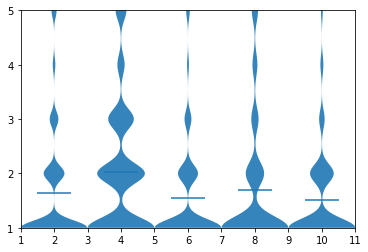

In [267]:

fig, ax = plt.subplots()
vp = ax.violinplot([rischio_na,rischio_sa,rischio_ce,rischio_bn,rischio_av],[2,4,6,8,10],widths=2, showmeans=True, showmedians=False, showextrema=False)

for body in vp['bodies']:
    body.set_alpha(0.9)
ax.set(xlim=(1, 11), xticks=np.arange(1, 12),
       ylim=(1, 5), yticks=np.arange(1, 6))
plt.show()



In [330]:
linee_aggr = df.aggregazione.unique()
rm_aggr = {}
for i in linee_aggr:
    rm_aggr[i] = int(df.categoria_assegnata_da_cu.loc[df.aggregazione == i].mean())

{'COMMERCIO AL DETTAGLIO DI ALIMENTI E BEVANDE': 1,
 "COMMERCIO ALL'INGROSSO DI ALIMENTI E BEVANDE, CASH AND CARRY": 1,
 'RISTORAZIONE PUBBLICA': 1,
 '8 - PRODOTTI DELLA PESCA': 3,
 '6 - PRODOTTI A BASE DI CARNE': 3,
 "0 - ATTIVITA' GENERALI": 3,
 'LAVORAZIONE E TRASFORMAZIONE DI CARNE, PRODOTTI A BASE DI CARNE E PREPARAZIONI DI CARNE IN IMPIANTI NON RICONOSCIUTI FUNZIONALMENTE ANNESSI A ESERCIZIO DI VENDITA, CONTIGUI O MENO AD ESSI ': 1,
 'RISTORAZIONE COLLETTIVA (COMUNITA ED EVENTI)': 1,
 'PRODUZIONE DI PRODOTTI A BASE DI LATTE (IN IMPIANTI NON RICONOSCIUTI)': 1,
 'LAVORAZIONE DI FRUTTA E DI ORTAGGI (ESCLUSI I SUCCHI DI FRUTTA E DI ORTAGGI)': 1,
 'PRODUZIONE DI PASTA SECCA E/O FRESCA': 1,
 '9 - LATTE CRUDO E DERIVATI': 3,
 'PRODUZIONE DI BEVANDE ALCOLICHE E ACETI': 1,
 'PRODUZIONE DI PANE, PIZZA E PRODOTTI DA FORNO E DI PASTICCERIA - FRESCHI E SECCHI': 1,
 'PRODUZIONE DI PRODOTTI DI GELATERIA (IN IMPIANTI NON RICONOSCIUTI)': 1,
 'PRODUZIONE DI CIBI PRONTI IN GENERE': 1,
 '1 - CARNE D

In [9]:
col_name2 = ["id_stabilimento",
    "comune",
    "provincia_stab",
    "popolazione",
    "asl",
    "macroarea",
    "aggregazione",
    "attivita",
    "punteggio",
    "categoria_rischio_stabilimento",
    "categoria_assegnata_da_cu",
    "categoria_ex_ante",
    "controllati"]


conn2 = connect(param_dic)

df_clean = postgresql_to_dataframe(conn2, "select full___gisa.id_stabilimento, full___gisa.comune,full___gisa.provincia_stab,coalesce(full___gisa.popolazione,0),full___gisa.asl,full___gisa.macroarea,full___gisa.aggregazione,full___gisa.attivita,full___gisa.punteggio,full___gisa.categoria_rischio_stabilimento,full___gisa.categoria_assegnata_da_cu,full___gisa.categoria_ex_ante,full___gisa.controllati from full___gisa", col_name2)


Connecting to the PostgreSQL database...
Connection successful


### Preparazione dati

In [155]:
df_clean.describe()

,id_stabilimento,comune,provincia_stab,popolazione,asl,macroarea,aggregazione,attivita,punteggio,categoria_rischio_stabilimento,categoria_assegnata_da_cu,categoria_ex_ante,controllati
count,238978,238968,238978,238978,231153,238978,238978,238978,63392,63392,63392,206325,238978
unique,182798,571,5,521,7,35,156,290,849,5,5,4,2
top,100001656,napoli,napoli,914758,207,PRODUZIONE PRIMARIA,RISTORAZIONE PUBBLICA,COMMERCIO AL DETTAGLIO DI ALIMENTI E BEVANDE I...,NULL,1,1,2,0
freq,91,25680,88304,25680,55850,66082,58016,48265,847,38560,38410,124381,175586


In [18]:
df_clean['controllati'] = df_clean['controllati'].astype(int)
df_clean['popolazione'] = df_clean['popolazione'].astype(int)


In [31]:
rischio_arr = np.array(df_clean.categoria_rischio_stabilimento)
rischio_arr = np.array(list(filter(lambda x: x in [1,2,3,4,5,'1','2','3','4','5'], rischio_arr)))
rischio_arr = rischio_arr.astype(int)

In [13]:
df_contr = df_clean[df_clean.controllati ==1]
df_non_contr = df_clean[df_clean.controllati ==0 ]

In [164]:
df_contr = df_contr.drop(df_contr[df_contr.popolazione == 0].index)
df_contr = df_contr.drop(df_contr[df_contr.punteggio == 0].index)
df_non_contr = df_non_contr.drop(df_non_contr[df_non_contr.popolazione == 0].index)
df_non_contr = df_non_contr.drop(df_non_contr[df_non_contr.punteggio == 0].index)

#df_contr.apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()
#df_non_contr.apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

df_contr = df_contr.drop(df_contr[df_contr.punteggio == 'NULL'].index)
df_non_contr = df_non_contr.drop(df_non_contr[df_non_contr.punteggio == 'NULL'].index)

df_contr.popolazione = df_contr.popolazione.astype(int)
df_contr.punteggio = df_contr.punteggio.astype(int)
df_non_contr.popolazione = df_contr.popolazione.astype(int)
df_non_contr.punteggio = df_contr.punteggio.astype(int)
df_contr.categoria_rischio_stabilimento = df_contr.categoria_rischio_stabilimento.astype(int)
rischio_arr = np.array(df_contr.categoria_rischio_stabilimento)
rischio_arr = np.array(list(filter(lambda x: x in [1,2,3,4,5,'1','2','3','4','5'], rischio_arr)))
rischio_arr = rischio_arr.astype(int)

In [57]:
df_contr.categoria_assegnata_da_cu = df_contr.categoria_assegnata_da_cu.astype(int)
df_contr.categoria_ex_ante = df_contr.categoria_ex_ante.astype(int)


In [283]:
df_contr["rischio_in_aumento"] = np.where((df_contr.categoria_assegnata_da_cu > df_contr.categoria_ex_ante), "si","no")

In [284]:
df_contr.head()

,id_stabilimento,comune,provincia_stab,popolazione,asl,macroarea,aggregazione,attivita,punteggio,categoria_rischio_stabilimento,categoria_assegnata_da_cu,categoria_ex_ante,controllati,rischio_in_aumento
0,19006,candida,avellino,1085,201,COMMERCIO ALIMENTI USO UMANO,COMMERCIO AL DETTAGLIO DI ALIMENTI E BEVANDE,COMMERCIO AL DETTAGLIO DI ALIMENTI E BEVANDE I...,115,1,1,2,1,no
1,19006,candida,avellino,1085,201,COMMERCIO ALIMENTI USO UMANO,COMMERCIO AL DETTAGLIO DI ALIMENTI E BEVANDE,COMMERCIO AL DETTAGLIO DI ALIMENTI E BEVANDE I...,71,1,1,2,1,no
2,19016,avellino,avellino,52568,201,COMMERCIO ALIMENTI USO UMANO,COMMERCIO AL DETTAGLIO DI ALIMENTI E BEVANDE,COMMERCIO AL DETTAGLIO DI ALIMENTI E BEVANDE I...,56,1,1,2,1,no
3,19017,avellino,avellino,52568,201,COMMERCIO ALIMENTI USO UMANO,COMMERCIO AL DETTAGLIO DI ALIMENTI E BEVANDE,COMMERCIO AL DETTAGLIO DI ALIMENTI E BEVANDE I...,50,1,1,2,1,no
4,19022,avellino,avellino,52568,201,COMMERCIO ALIMENTI USO UMANO,COMMERCIO AL DETTAGLIO DI ALIMENTI E BEVANDE,COMMERCIO AL DETTAGLIO DI ALIMENTI E BEVANDE I...,75,1,1,2,1,no


### Regressione lineare

arr_train_x = np.array(df_contr.popolazione)
arr_train_y = np.array(df_contr.punteggio)

In [41]:
len(rischio_arr)

60392

In [236]:
arr_train_x = arr_train_x.reshape(60392,1)
arr_train_y = arr_train_y.reshape(60392,1)

Divido il dataset in un train set e test set

In [237]:
from sklearn.model_selection import train_test_split

In [238]:
X_train, X_test, Y_train, Y_test = train_test_split(arr_train_x ,arr_train_y, test_size = 0.2)


Importo le librerie per la regressione lineare

In [239]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [240]:
model = linear_model.LinearRegression()

In [241]:
model.fit(X_train, Y_train)

LinearRegression()

In [242]:
Y_pred = model.predict(X_test)

In [243]:
print("Coefficienti:", model.coef_)
print("Intercetta:", model.intercept_)
print("Scarto quadratico medio: %.2f" % mean_squared_error(Y_test,Y_pred))
print("Coefficente di determinazione: %.2f" % r2_score(Y_test,Y_pred))

Coefficienis: [[-1.21802153e-05]]
Intercetta: [163.4524665]
Scarto quadratico medio: 22183.45
Coefficente di determinazione: -0.00


#### La regressione lineare non è efficace, ciò è appurato dal coefficiente di determinazione, che è uguale a 0

In [42]:
np.corrcoef(arr_train_x,rischio_arr)

array([[ 1.        , -0.02828698],
       [-0.02828698,  1.        ]])

In [25]:
aggr_rischiose_mean = df_contr[(df_contr.rischio_in_aumento == 'si')].groupby(by='aggregazione').categoria_assegnata_da_cu.mean() > 2

NameError: name 'df_contr' is not defined

In [286]:
aggr_rischiose_mean.sort_values(ascending=False).nlargest(30)

aggregazione
4 - CARNE DI SELVAGGINA CACCIATA                                                                                                                              5.000000
PRODUZIONE, TRASFORMAZIONE E DEPOSITO E COMMERCIO MATERIALI A CONTATTO CON GLI ALIMENTI                                                                       5.000000
COMMERCIO ALL'INGROSSO DI ALIMENTI E BEVANDE NON SOGGETTO A RICONOSCIMENTO, CASH AND CARRY NON SOGGETTO A RICONOSCIMENTO, MERCATI ALL'INGROSSO                5.000000
CLINICA VETERINARIA - CASA DI CURA VETERINARIA                                                                                                                5.000000
CANILI/STRUTTURE DI DETENZIONE ANIMALI D'AFFEZIONE (commercio dettaglio)                                                                                      5.000000
6 - PRODOTTI A BASE DI CARNE                                                                                                                            

In [10]:
rapporto_contr_tot = (df_clean.loc[df_clean.controllati == 1].groupby('comune').id_stabilimento.count() / df_clean.groupby('comune').id_stabilimento.count()).sort_values() 

In [354]:
rapporto_contr_tot.to_csv(r'/Users/francesco/Desktop/rapporto_contr_comuni')

In [449]:
rapporto_contr_tot.rapporto[rapporto_contr_tot.rapporto <0.3].nsmallest(98)

comune
furore                    0.011494
senerchia                 0.012821
san mauro cilento         0.018519
carinola                  0.021869
villanova del battista    0.023256
                            ...   
ceraso                    0.100775
castelfranci              0.101695
flumeri                   0.102041
taurano                   0.103704
ascea                     0.104575
Name: rapporto, Length: 98, dtype: float64

In [384]:
#rapporto_contr_tot = rapporto_contr_tot.to_frame()
#rapporto_contr_tot = rapporto_contr_tot.rename(columns = {"id_stabilimento":"rapporto"})

In [441]:
mediana = np.median(np.array(round(rapporto_contr_tot.rapporto.dropna(),2)))

0.2

In [14]:
def mypercentile(numint, ar):
    ar.sort()
    #print (ar)
    left=ar[0]
    right=ar[-1]
    #print(left, right)
    intlen=(right-left+1)/numint
    hist= [0] * numint
    currnum=0
    currint=0
    for a in ar:
         
         while a > left + currint*intlen:
             currint += 1
         hist[currint] += 1
    n=0
    #for v in hist:  
        #print(n, v)

    plt.hist(ar)
    plt.show() 

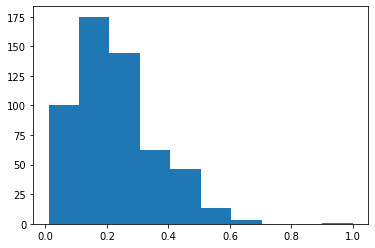

In [15]:
mypercentile(100,np.array(round(rapporto_contr_tot.dropna(),2)))

## Implementazione:
Filtro: 
- rischio_in_aumento = 1
- controllati = 0
- comune rischioso
- aggregazione rischiosa

Per ogni asl:
Creare 5 array per in base al delta tra media aggregazione e rischio unirli in ordine

In [5]:
import pandas as pd 
import psycopg2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def connect(params_dic):
    conn = None
    try:
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params_dic)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1) 
    print("Connection successful")
    return conn

def postgresql_to_dataframe(conn, select_query, column_names):
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Otteniamo una lista di tuple
    tupples = cursor.fetchall()
    cursor.close()
    
    # Convertiamo la lista di tuple in un DataFrame pandas
    df = pd.DataFrame(tupples, columns=column_names)
    return df

In [7]:
param_dic = {
    "host"      : "localhost",
    "database"  : "gisa",
    "user"      : "postgres",
    "password"  : "12345"
}
col_names_ = ["id_stabilimento","comune","provincia_stab","macroarea","aggregazione","attivita","punteggio","categoria_rischio_stabilimento","categoria_assegnata_da_cu","categoria_ex_ante","popolazione","rischio_in_aumento","controllati","id_asl"]


In [8]:
conn_ = connect(param_dic)


Connecting to the PostgreSQL database...
Connection successful


In [9]:
df_gisa = postgresql_to_dataframe(conn_,"select * from gisa_completo",col_names_)

## Cleaning

In [21]:
df_gisa.categoria_assegnata_da_cu = df_gisa.categoria_assegnata_da_cu[df_gisa.categoria_assegnata_da_cu.isin([1,2,3,4,5,'1','2','3','4','5'])].astype(int)
df_gisa.rischio_in_aumento = df_gisa.rischio_in_aumento[df_gisa.rischio_in_aumento.isin([0,1])].astype(int)
df_gisa.controllati = df_gisa.controllati.astype(int)
df_gisa.id_asl = df_gisa.id_asl.replace(np.nan,0)
df_gisa.id_asl = df_gisa.id_asl.astype(int)

In [22]:
rapporto_contr_tot = (df_gisa.loc[df_gisa.controllati == 1].groupby('comune').id_stabilimento.count() / df_gisa.groupby('comune').id_stabilimento.count()).sort_values()
rapporto_contr_tot.replace(np.nan,0)
comuni_rischiosi = list(rapporto_contr_tot[rapporto_contr_tot <= 0.2].keys())
aggr_rischiose = df_gisa[(df_gisa.rischio_in_aumento == 1 )].groupby(by='aggregazione').categoria_assegnata_da_cu.mean()
aggr_rischiose = list(aggr_rischiose[aggr_rischiose > 3].keys())

In [23]:
filter_ = (df_gisa.controllati == 0) & (df_gisa.aggregazione.isin(aggr_rischiose)) & (df_gisa.comune.isin(comuni_rischiosi))

In [24]:
da_controllare = df_gisa[filter_]

In [25]:
print("Le righe senza asl sono",len(da_controllare[-da_controllare.id_asl.isin([201,202,203,204,205,206,207])]))

Le righe senza asl sono 1845


Righe senza asl: 

In [34]:
da_controllare[-da_controllare.id_asl.isin([201,202,203,204,205,206,207])]

,id_stabilimento,comune,provincia_stab,macroarea,aggregazione,attivita,punteggio,categoria_rischio_stabilimento,categoria_assegnata_da_cu,categoria_ex_ante,popolazione,rischio_in_aumento,controllati,id_asl
197,21098,santa maria capua vetere,caserta,RISTORAZIONE,RISTORAZIONE PUBBLICA,BAR ED ESERCIZI SIMILARI,None,None,NaN,2,None,NaN,0,0
198,21111,santa maria capua vetere,caserta,COMMERCIO ALIMENTI USO UMANO,COMMERCIO AL DETTAGLIO DI ALIMENTI E BEVANDE,COMMERCIO AL DETTAGLIO DI ALIMENTI E BEVANDE I...,None,None,NaN,2,None,NaN,0,0
200,21132,santa maria capua vetere,caserta,"VEGETALI - PRODUZIONE, TRASFORMAZIONE E CONFEZ...","LAVORAZIONE DI CEREALI, SEMI, LEGUMI E TUBERI",MOLITURA DI FRUMENTO E ALTRI CEREALI,None,None,NaN,2,None,NaN,0,0
201,21156,santa maria capua vetere,caserta,"PRODOTTI DA FORNO E DI PASTICCERIA, GELATI E P...",PRODUZIONE DI CIBI PRONTI IN GENERE,PRODUZIONE DI CIBI PRONTI IN GENERE (PRODOTTI ...,None,None,NaN,3,None,NaN,0,0
202,21156,santa maria capua vetere,caserta,"PRODOTTI DA FORNO E DI PASTICCERIA, GELATI E P...",PRODUZIONE DI PASTA SECCA E/O FRESCA,"PRODUZIONE DI PASTE ALIMENTARI, DI CUSCUS E DI...",None,None,NaN,3,None,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237228,1102059,sant'agata de'goti,benevento,RISTORAZIONE,RISTORAZIONE COLLETTIVA (COMUNITA ED EVENTI),PRODUZIONE PASTI PRONTI PER RISTORAZIONE COLLE...,None,None,NaN,3,None,NaN,0,0
237374,1103047,sant'agata de'goti,benevento,RISTORAZIONE,RISTORAZIONE PUBBLICA,RISTORAZIONE CON SOMMIMISTRAZIONE DIRETTA (ANC...,None,None,NaN,3,None,NaN,0,0
237395,1103195,sant'agata de'goti,benevento,RISTORAZIONE,RISTORAZIONE PUBBLICA,RISTORAZIONE CON SOMMIMISTRAZIONE DIRETTA (ANC...,None,None,NaN,3,None,NaN,0,0
237481,1103852,sant'agata de'goti,benevento,RISTORAZIONE,RISTORAZIONE PUBBLICA,RISTORAZIONE CON SOMMIMISTRAZIONE DIRETTA (ANC...,None,None,NaN,3,None,NaN,0,0
